In [27]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt

In [51]:
def classify():
    #implement a general classifier pipeline which can be used for multiple sklearn classifiers
    return "not implemented"

def get_pr_score(y_test, y_pred, plot=True):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred) #area under PR curve
    
    if plot:
        plt.clf()
        plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall curve')
        plt.show()
    
    return avg_precision

def get_roc_score(y_test, y_pred, plot=True):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) #area under PR curve
    
    if plot:
        plt.clf()
        plt.plot(fpr, tpr, lw=2, color='navy', label='Precision-Recall curve')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.show()
    
    return roc_auc

def run_gridsearch(x_train, y_train):
    param_grid = {'n_estimators':[100, 200, 400, 600],
                 'max_features':['auto', 'log2'],
                 'max_depth':[8, 12, 16, 20]}
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=8, n_jobs=-1)
    
    cv_clf = GridSearchCV(estimator=clf, scoring='roc_auc', param_grid=param_grid, cv=5, n_jobs=-1)
    cv_clf.fit(x_train, y_train)  
    print(cv_clf.best_params_)
    
    return cv_clf.best_estimator_

In [4]:
if __name__ == "__main__":
    training_rows = range(50000)
    data = pd.read_csv("/home/kaushalya/Coding/wsdm_cup/vandalism/data/features100k_preprocessed_new.csv",
                       encoding='utf-8', header=0)
    labeled_data_file = "/home/kaushalya/Coding/wsdm_cup/vandalism/data/wikidata-vandalism-corpus-2015/wdvc15-ground-truth.csv"
    labeled_data = pd.read_csv(labeled_data_file, header=0)

In [52]:
    x_train = data.ix[training_rows,1:]
    y_train = labeled_data.ix[training_rows,'rollback_reverted']
    
    #TODO feature selection
    
    #running grid search to set parameters of the model
    clf = run_gridsearch(x_train, y_train)
    clf.fit(x_train, y_train)

{'max_features': 'log2', 'n_estimators': 600, 'max_depth': 12}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [6]:
    in_test = ~data.index.isin(training_rows)
    x_test = data.ix[in_test,1:]
    y_test = labeled_data.ix[in_test,'rollback_reverted']

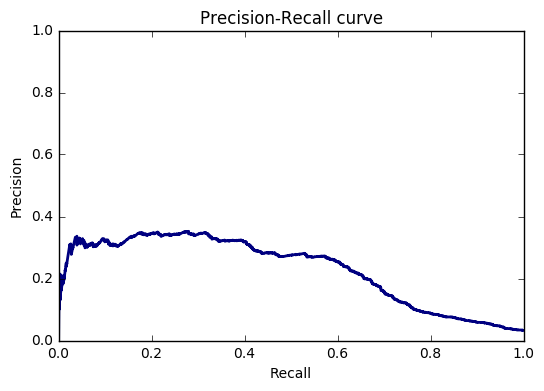

area under PR curve:0.228841
logloss score: 0.062349


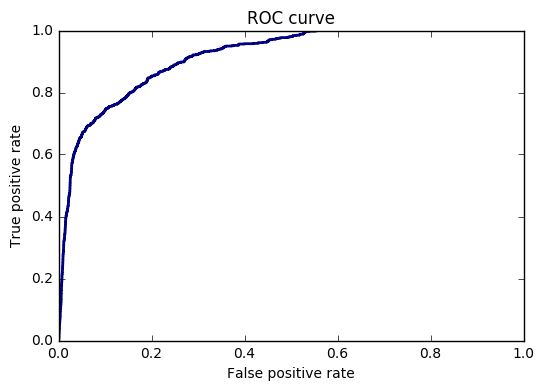

ROC-AUC score: 0.916654


In [55]:
    y_pred = clf.predict_proba(x_test)
    logloss_score = log_loss(y_test, y_pred)

    print("area under PR curve:%f"%get_pr_score(y_test, y_pred[:,1]))
    print("logloss score: %f"%logloss_score)
    print("ROC-AUC score: %f"%get_roc_score(y_test, y_pred[:,1]))

In [56]:
np.sum(y_pred[:,1]>=0.5)

29

In [16]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
np.sum(y_test)

916

In [54]:
prin

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)